In [ ]:
import pandas as pd
import numpy as np
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2

In [ ]:
!wget https://www.dropbox.com/s/va90dnmndh0x8el/28577_36420_bundle_archive.zip

--2021-05-30 10:18:04--  https://www.dropbox.com/s/va90dnmndh0x8el/28577_36420_bundle_archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/va90dnmndh0x8el/28577_36420_bundle_archive.zip [following]
--2021-05-30 10:18:04--  https://www.dropbox.com/s/raw/va90dnmndh0x8el/28577_36420_bundle_archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca82514fd811addd9f99858a64c.dl.dropboxusercontent.com/cd/0/inline/BPc3EDmWreEF94ukZsHZtZxTreIPJHmk_Zar8nntVZpgsV01V-X5MiBCAT1BP1-lAlKQHecHh5f4FlYT4npBHkRy4TeH_T1mSRJICGY0SygKNioZ5pGr3CITicylalu7hhQuhCzX_1UM3n62rwr95bOX/file# [following]
--2021-05-30 10:18:04--  https://uca82514fd811addd9f99858a64c.dl.dropboxusercontent.com/cd/0/inline/BPc3EDmWreEF94ukZsHZtZxTreIPJHmk_Zar

In [ ]:
!unzip 28577_36420_bundle_archive.zip

Archive:  28577_36420_bundle_archive.zip
  inflating: fer2013.csv             


In [ ]:
X_train, train_y, X_test, test_y = [],[],[],[]

In [ ]:
df = pd.read_csv('/content/fer2013.csv')

In [ ]:
for index, row in df.iterrows():
  val = row['pixels'].split(" ")
  try:
    if 'Training' in row['Usage']:
      X_train.append(np.array(val, 'float32'))
      train_y.append(row['emotion'])
    elif 'PublicTest' in row['Usage']:
      X_test.append(np.array(val,'float32'))
      test_y.append(row['emotion'])
  except:
    print(f"error accoured at index :(index")

In [ ]:
num_features = 64
num_labels   = 7
batch_size   = 64
epochs       = 50
width, height= 48,48

In [ ]:
X_train = np.array(X_train, 'float32')
train_y = np.array(train_y, 'float32')
X_test  = np.array(X_test, 'float32')
test_y  = np.array(test_y, 'float32')

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
train_y = to_categorical(train_y, num_classes=num_labels)
test_y = to_categorical(test_y, num_classes=num_labels)

In [ ]:
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48,1)
X_test  = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

In [ ]:
model.compile(loss=categorical_crossentropy, optimizer='sgd', metrics=['accuracy'])

In [ ]:
model.fit(X_train, train_y, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, test_y),
          shuffle=True)

Epoch 1/50
449/449 [==============================] - 57s 21ms/step - loss: 1.8510 - accuracy: 0.2494 - val_loss: 1.8177 - val_accuracy: 0.2497
Epoch 2/50
449/449 [==============================] - 8s 18ms/step - loss: 1.8012 - accuracy: 0.2520 - val_loss: 1.7982 - val_accuracy: 0.2533
Epoch 3/50
449/449 [==============================] - 8s 18ms/step - loss: 1.7767 - accuracy: 0.2584 - val_loss: 1.7907 - val_accuracy: 0.2516
Epoch 4/50
449/449 [==============================] - 8s 18ms/step - loss: 1.7709 - accuracy: 0.2615 - val_loss: 1.7647 - val_accuracy: 0.2742
Epoch 5/50
449/449 [==============================] - 8s 18ms/step - loss: 1.7519 - accuracy: 0.2772 - val_loss: 1.7476 - val_accuracy: 0.2870
Epoch 6/50
449/449 [==============================] - 8s 18ms/step - loss: 1.7391 - accuracy: 0.2914 - val_loss: 1.7231 - val_accuracy: 0.3054
Epoch 7/50
449/449 [==============================] - 8s 19ms/step - loss: 1.7094 - accuracy: 0.3102 - val_loss: 1.6864 - val_accuracy: 0.324

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 46, 46, 64)        640       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 44, 44, 64)        36928     
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 22, 22, 64)        0         
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 22, 22, 64)        0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 20, 20, 64)        36928     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 18, 18, 64)        36928     
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 9, 9, 64)          0

In [ ]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

In [ ]:
face_haar_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

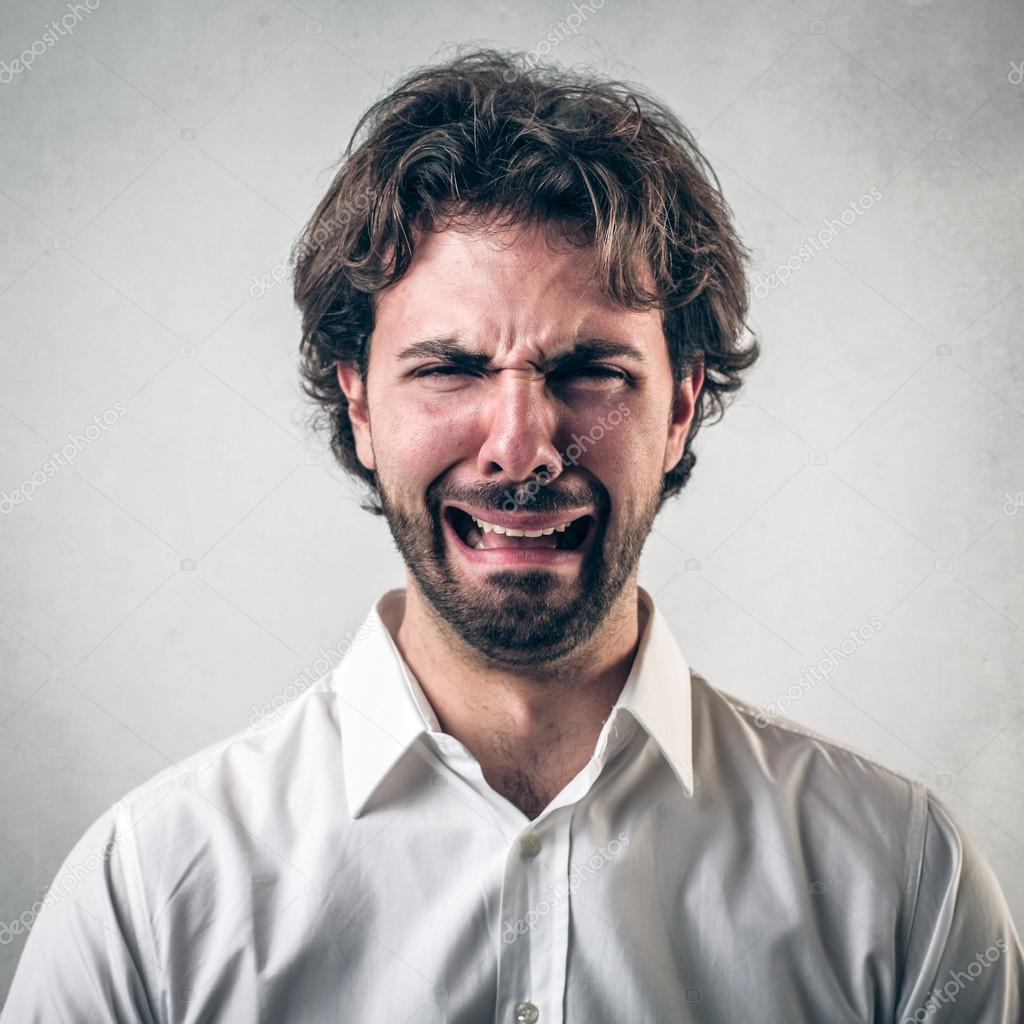

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
test_image = cv2.imread('/content/sad.jpg')
cv2_imshow(test_image)

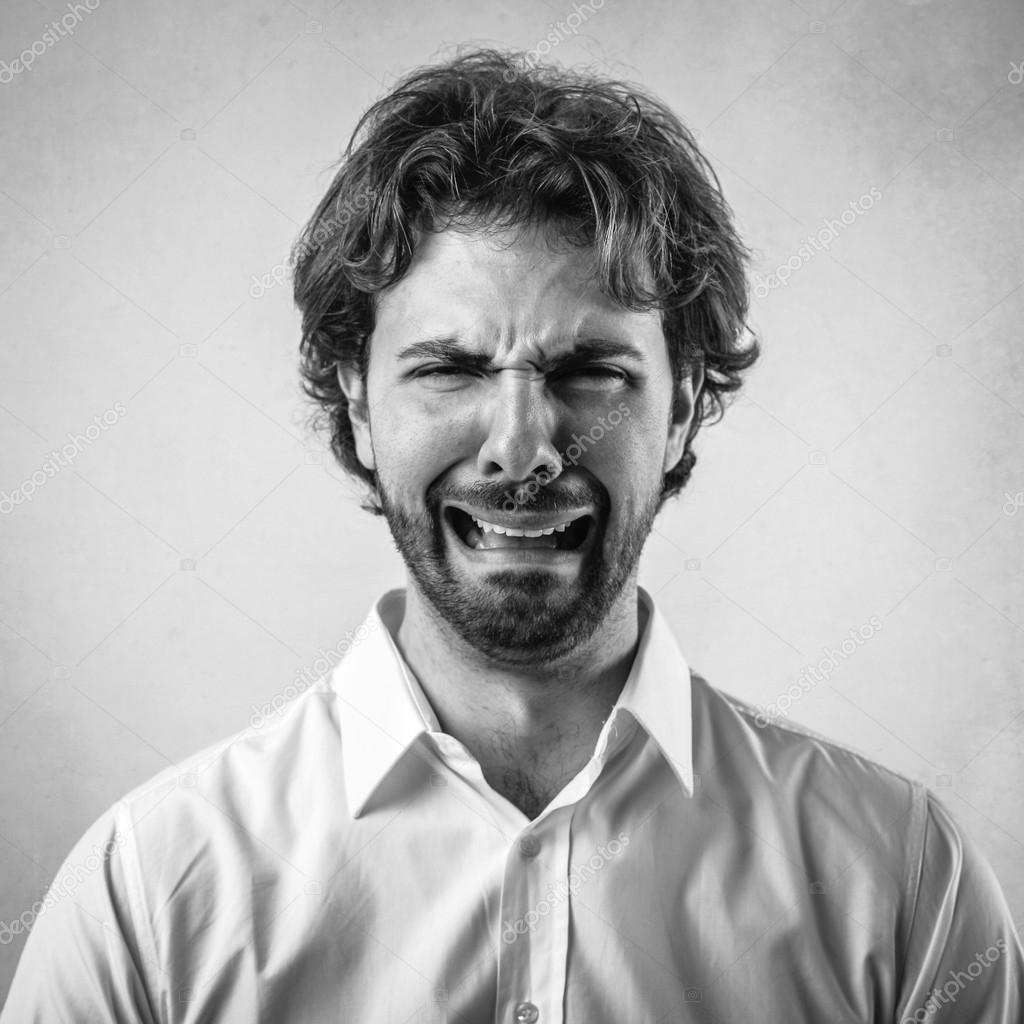

In [ ]:
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

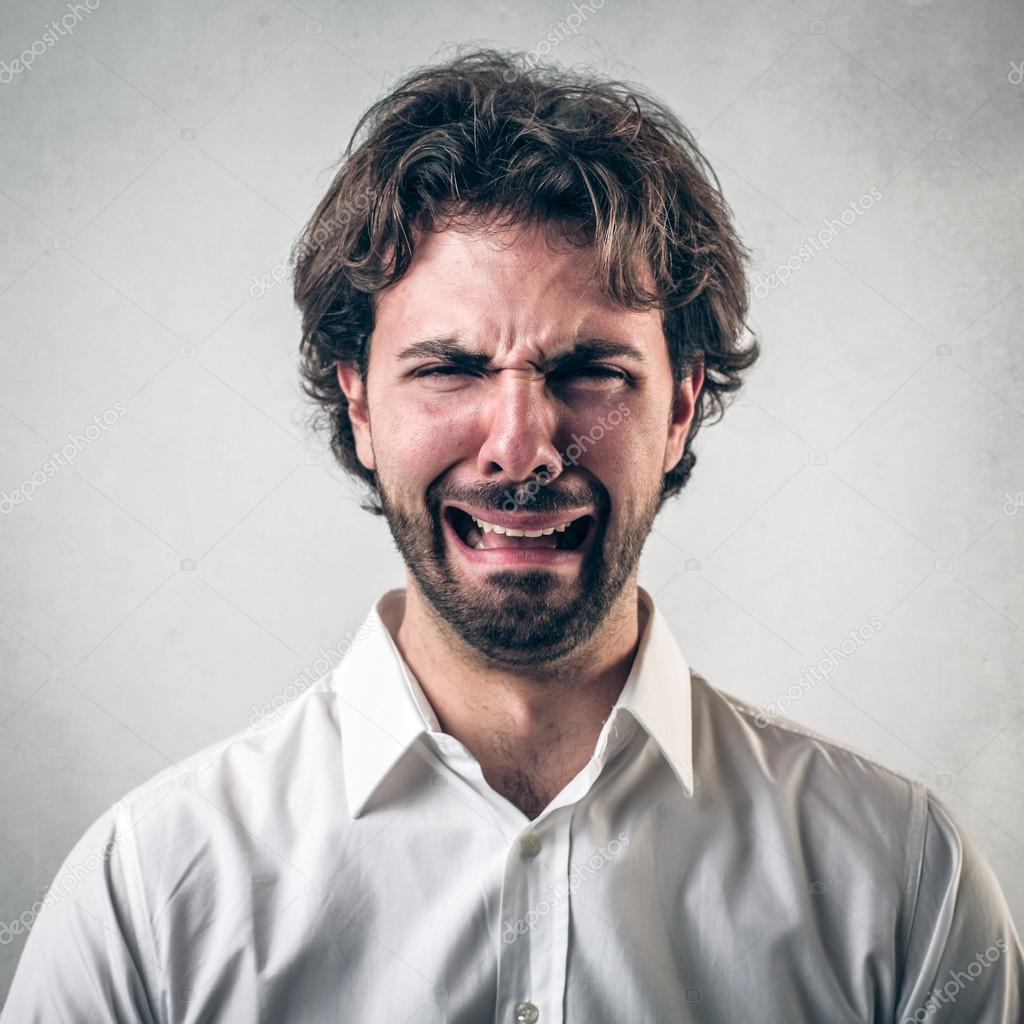

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
from keras.preprocessing.image import img_to_array
cv2_imshow(test_image)

happy


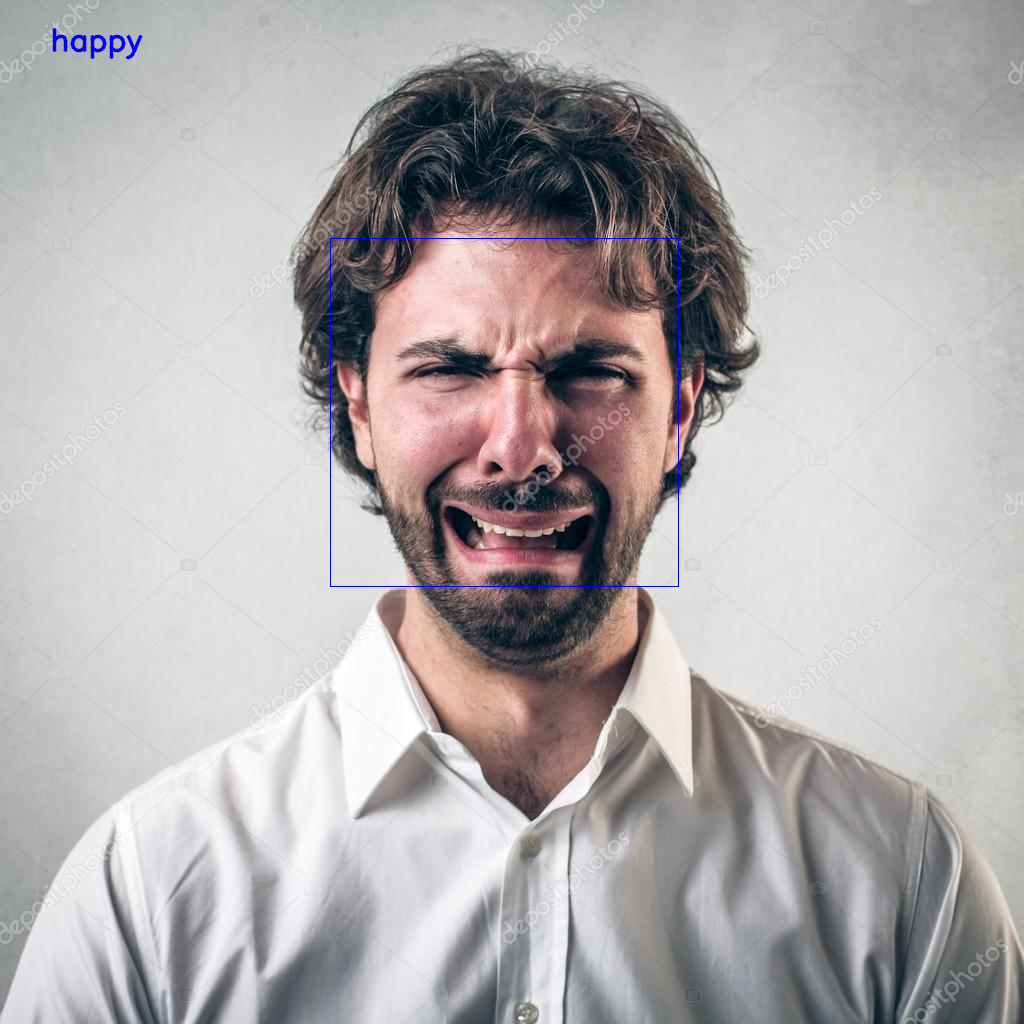

In [ ]:
faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)
for (x,y,w,h) in faces:
  cv2.rectangle(test_image, (x,y), (x+w, y+h), (255,0,0))
  roi_gray = gray_image[y:y+w, x:x+h]
  roi_gray = cv2.resize(roi_gray, (48,48))
  image_pixels = img_to_array(roi_gray)
  image_pixels = np.expand_dims(image_pixels, axis=0)
  image_pixels /= 255
  predictions = model.predict(image_pixels)
  max_index = np.argmax(predictions[0])
  emotion_detection = ('angry', 'disgust','fear','happy','sad','surprise','neutral')
  emotion_prediction = emotion_detection[max_index]
  print(emotion_prediction)
  font = cv2.FONT_HERSHEY_SIMPLEX
  org = (50,50)
  fontScale = 1
  color = (255,0,0)
  thickness = 2
  image = cv2.putText(test_image, emotion_prediction, org, font,fontScale, color, thickness, cv2.LINE_AA )
  cv2_imshow(image)